In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
from IPython.core.display import HTML
HTML('<link href="https://fonts.googleapis.com/css?family=Cabin|Quicksand" rel="stylesheet"><style>.container{width:90% !important; font-family: "Cabin", sans-serif;}em{color: red !important;}</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;} table, td, th {width: 75%; font-size: 100%;}</style>')

# Time Series


# Manipulating Time: Python

- Python offers several ways to represent notions of
    - dates
    - times
    - deltas
    - timespans
- and operate on those notions via the libraries
    - datetime 
    - dateutil (third-party, not Core) 
- **pro:**  flexibility and easy syntax: easily perform any type of operation
- **con:**  efficiency when working with large arrays of dates and times

# Manipulating Time : Numpy

- Numpy offers the `datetime64` dtype to encode dates as 64-bit integers
- this allows arrays of dates to be represented very compactly
- **pro:** efficient
- **con:** it lacks many of the convenient methods and functions provided by `datetime` and `dateutil`

# Manipulating Time: Pandas

- Pandas provides a `Timestamp` object
- it combines the ease-of-use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`
- From Timestamp objects, we can build a DatetimeIndex to index data in a Series or DataFrame


# Time notions in Pandas

- *Time stamps* (e.g., June 5th, 2020 at 9:30am)
- *Time intervals* of uniform length that do not overlap, i.e. fixed frequency (e.g., every minute in a day period)
- *Time deltas* or durations (e.g., a duration of 22.56 seconds).

## Different ways of creating the months of 2021

In [62]:
date = pd.date_range('2021-01', '2022-01', freq='M')
date

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [67]:
pd.date_range('2021-01', periods=12, freq='M')

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [40]:
date = pd.to_datetime("5th of June, 2020")
date

Timestamp('2020-06-05 00:00:00')

In [41]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16'],
              dtype='datetime64[ns]', freq=None)

#  Indexing by Time

- the notion of a specialized time type is useful when indexing data by timestamps
- e.g. consider a Series with time indexed data:

In [68]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
                          '2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

we can use specialised slices

In [69]:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

passing a year we obtain a slice of all data from that year

In [44]:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

# Time Data Structures in Pandas

- for time stamps we have `Timestamp` with associated index `DatetimeIndex`
- for time periods we have `Period` with associated index `PeriodIndex`
- for time deltas or durations we have `Timedelta` with associated index `TimedeltaIndex`

To create these objects we use `pd.to_datetime()`
- passing a single date yields a Timestamp
- passing a series of dates yields a DatetimeIndex

In [46]:
dates = pd.to_datetime('3rd of July, 2020')
dates

Timestamp('2020-07-03 00:00:00')

One can specify ad-hoc parsing formats

|Code|Meaning	Time span (relative)| Time span (absolute)|
|---|---|---|
|Y|	Year	|± 9.2e18 years	|[9.2e18 BC, 9.2e18 AD]|
|M|	Month	|± 7.6e17 years	|[7.6e17 BC, 7.6e17 AD]|
|W|	Week	|± 1.7e17 years	|[1.7e17 BC, 1.7e17 AD]|
|D|	Day	|± 2.5e16 years	|[2.5e16 BC, 2.5e16 AD]|
|h|	Hour	|± 1.0e15 years	|[1.0e15 BC, 1.0e15 AD]|
|m|	Minute	|± 1.7e13 years	|[1.7e13 BC, 1.7e13 AD]|
|s|	Second	|± 2.9e12 years	|[ 2.9e9 BC, 2.9e9 AD]|
|ms|	Millisecond	|± 2.9e9 years	|[ 2.9e6 BC, 2.9e6 AD]|
|us|	Microsecond	|± 2.9e6 years	|[290301 BC, 294241 AD]|
|ns|	Nanosecond	|± 292 years	|[ 1678 AD, 2262 AD]|
|ps|	Picosecond	|± 106 days	|[ 1969 AD, 1970 AD]|
|fs|	Femtosecond	|± 2.6 hours	|[ 1969 AD, 1970 AD]|
|as|	Attosecond	|± 9.2 seconds	|[ 1969 AD, 1970 AD]|


In [47]:
pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')

Timestamp('2010-11-12 00:00:00')

In [48]:
pd.to_datetime('12-11-2010 00:00', format='%m-%d-%Y %H:%M')

Timestamp('2010-12-11 00:00:00')

In [49]:
from datetime import datetime
dates = pd.to_datetime([datetime(2020, 7, 1), '2nd of July, 2020', 
                        '2020-Jul-3', '07-04-2020', '20200705'])
dates

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05'],
              dtype='datetime64[ns]', freq=None)

- to convert `DatetimeIndex` to a `PeriodIndex` 
- use `to_period()` with the addition of a frequency code
- this will raise a ValueError when converting a DatetimeArray/Index with non-regular values, so that a frequency cannot be inferred

In [50]:
dates = pd.to_datetime(["2000-03-31 00:00:00","2000-05-31 00:00:00","2000-08-31 00:00:00"])
dates.to_period('M')

PeriodIndex(['2000-03', '2000-05', '2000-08'], dtype='period[M]')

In [51]:
p = pd.Period('2020', freq='M')
p + 1

Period('2020-02', 'M')

- to create a `TimedeltaIndex` one can e.g. subtract dates

In [52]:
dates - dates[0]

TimedeltaIndex(['0 days', '61 days', '153 days'], dtype='timedelta64[ns]', freq=None)

# Regular sequences: 

- to create a sequence of regular dates 
    - pd.date_range() for timestamps
    - pd.period_range() for periods
    - pd.timedelta_range() for time deltas
- these functions accept 
    - a start date
    - an end date
    - an optional frequency code (by default the frequency is one day)

In [63]:
pd.date_range('2020-07-03', '2020-07-10')

DatetimeIndex(['2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10'],
              dtype='datetime64[ns]', freq='D')

In [64]:
# Note February
pd.date_range('2011-1-1','2012-1-1', freq='M')

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31'],
              dtype='datetime64[ns]', freq='M')

In [65]:
pd.date_range('2020-07-03', periods=8)

DatetimeIndex(['2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10'],
              dtype='datetime64[ns]', freq='D')

In [66]:
pd.date_range('2020-07-03', periods=8, freq='H')

DatetimeIndex(['2020-07-03 00:00:00', '2020-07-03 01:00:00',
               '2020-07-03 02:00:00', '2020-07-03 03:00:00',
               '2020-07-03 04:00:00', '2020-07-03 05:00:00',
               '2020-07-03 06:00:00', '2020-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

# Frequencies and Offsets

- a fundamental concept is that of *frequency* and that of *date offset*
- use prefix `'B'` for the Business version, as in `BA` = busines year end
|Code|Description|
|---|---|
|D	|Calendar day	|
|W	|Weekly		|
|M	|Month end	|
|Q	|Quarter end|	
|A	|Year end	|
|H	|Hours	|
|T	|Minutes|		
|S	|Seconds|		
|L	|Milliseonds		|
|U	|Microseconds		|
|N	|nanoseconds	|

# Frequencies and Offsets

- The monthly, quarterly, and annual frequencies are all marked at the end of the specified period
- By adding an S suffix to any of these, they instead will be marked at the beginning
- use prefix `'B'` for the Business version, as in `BMS` = busines month start

|Code|Description|
|---|---|
|MS	|Month start|
|QS	|Quarter start|
|AS	|Year start|

- codes can be combined with numbers to specify other frequencies
- E.g. to get a frequency of 2 hours 30 minutes: combine the hour (H) and minute (T) codes

In [70]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

# Resampling, Shifting, and Windowing

- A common need for time series data is resampling at a higher or lower frequency
- To do so use 
    - `resample()`  is a data aggregation technique, i.e. a time-based groupby, followed by a reduction method on each of its groups
    -  `asfreq()` is a data selection technique, i.e. it generates a date_range and calls reindex

- we use `pandas-datareader` package (installable via `conda install pandas-datareader`)
- to import financial data from a number of available sources
- let's import data on 10-year constant maturity yields on U.S. government bonds

In [1]:
import pandas_datareader as pdr
gs = pdr.get_data_fred('GS10', start='2004', end='2016')

In [3]:
gs.index[:8]

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [5]:
gs.head()

,GS10
DATE,
2004-01-01,4.15
2004-02-01,4.08
2004-03-01,3.83
2004-04-01,4.35
2004-05-01,4.72


In [9]:
gs.asfreq('BM','nearest').head()

,GS10
DATE,
2004-01-30,4.08
2004-02-27,3.83
2004-03-31,4.35
2004-04-30,4.72
2004-05-31,4.73


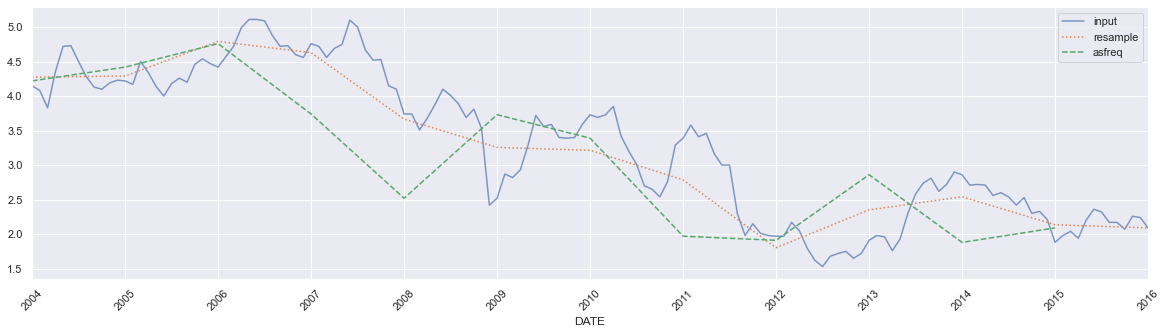

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
gs.plot(alpha=0.7, style='-', ax=ax)
gs.resample('BA').mean().plot(style=':', ax=ax)
gs.asfreq('BA','nearest').plot(style='--', ax=ax);
plt.legend(['input', 'resample', 'asfreq'])
xticks = pd.date_range(gs.index.min(), gs.index.max(), freq='YS')
ax.set_xticks(xticks); 
ax.set_xticklabels([x.strftime('%Y') for x in xticks]); 
plt.xticks(rotation=45);

- `resample` reports the average of the previous year
- `asfreq` reports a specific value (here the end of the year)

- it is possible to *up-sample*, i.e. to generate intermediate values 
- the default is to generate NaN
- one can specify `method='bfill'` for "back-fill" or `method='ffill'` for "forward-fill" or `method='nearest'`

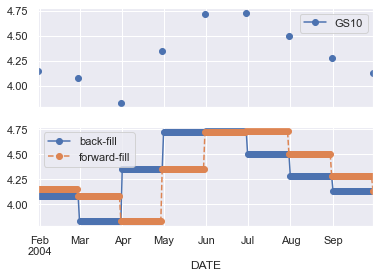

In [258]:
fig, ax = plt.subplots(2, sharex=True)
data = gs.iloc[:10]
# first downsample to month
data = data.asfreq('M', method='pad')
# now upsample to days
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

# Time-shifts

- A common time series-specific operation is shifting of data in time
- `shift()` shifts the data in multiples of the frequency
- when `freq` is specified, shift method changes all the dates in the index rather than changing the alignment of the data and the index
- working with fixed frequencies allows fast data alignment operations

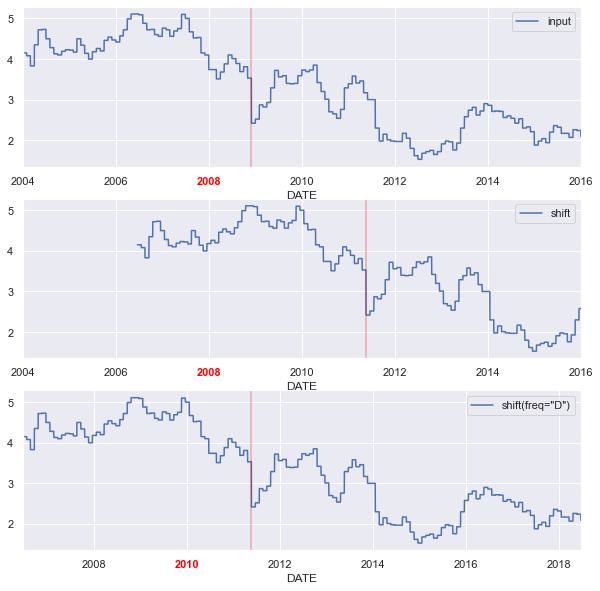

In [304]:
fig, ax = plt.subplots(3, sharey=True, figsize=(10,10))

# apply a frequency to the data
gs = gs.asfreq('D', method='pad') 

off = 900
gs.plot(ax=ax[0])
gs.shift(off).plot(ax=ax[1])
gs.shift(off, freq='D').plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2008-11-30')
offset = pd.Timedelta(off, 'D')

ax[0].legend(['input'])
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift'])
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['shift(freq="D")'])
ax[2].get_xticklabels()[2].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

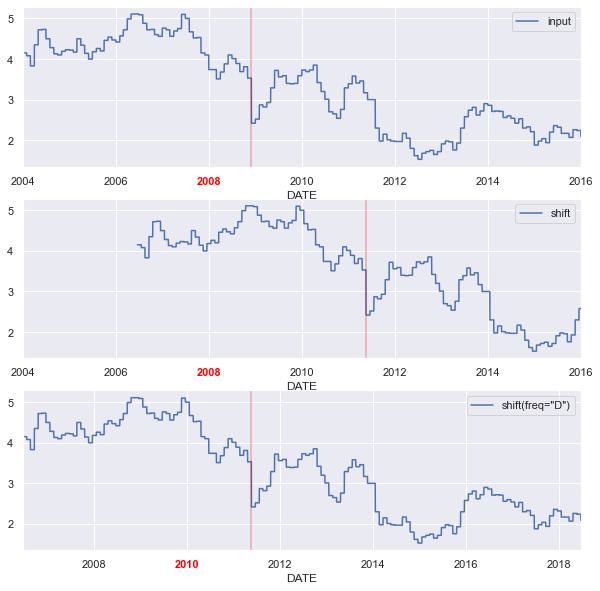

In [305]:
fig

- A common use for shift is in computing differences over time
- e.g. use shifted values to compute the one-year return on investment

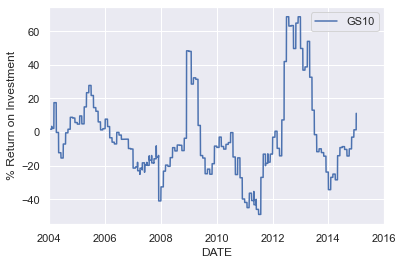

In [214]:
ROI = 100 * (gs.shift(-365) / gs - 1)
ROI.plot()
plt.ylabel('% Return on Investment');